<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/regressao_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#obtendo os arquivos de dados
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

--2022-04-09 16:49:07--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1397869 (1.3M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   1.33M  --.-KB/s    in 0.04s   

2022-04-09 16:49:07 (34.6 MB/s) - ‘train.csv’ saved [1397869/1397869]

--2022-04-09 16:49:07--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573899 (560K) [text/pla

In [3]:
# lendo o arquivo de treino
dfTrain = pd.read_csv('train.csv')
#dfTest = pd.read_csv('test.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [4]:
#estatística descritiva das variáveis
dfTrain.describe()

Id        score           V3           V4           V5  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean   2940.652499    29.121340     0.006104     0.000044     0.002964   
std    1699.192364    10.755535     0.005490     0.000035     0.003076   
min       1.000000     7.000000     0.000830     0.000002     0.000330   
25%    1475.000000    21.371000     0.003600     0.000023     0.001590   
50%    2946.000000    27.630000     0.004900     0.000035     0.002250   
75%    4415.000000    36.483000     0.006770     0.000053     0.003270   
max    5873.000000    54.992000     0.099990     0.000446     0.057540   

                V6           V7           V8           V9          V10  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean      0.003245     0.008893     0.034051     0.311054     0.017160   
std       0.003616     0.009229     0.025476     0.227168     0.013016   
min       0.000430     0.000980     0.003060     0.026000     0.001610   
25%       0.001830     0.004780     0.019260     0.177000     0.009310   
50%       0.002480     0.006760     0.027750     0.255000     0.013770   
75%       0.003430     0.009800     0.039990     0.366000     0.020690   
max       0.069560     0.172630     0.239150     1.970000     0.162670   

               V11          V12          V13          V14          V15  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean      0.020166     0.027513     0.051478     0.031895    21.691668   
std       0.016394     0.019818     0.039049     0.057913     4.283338   
min       0.001940     0.002490     0.004840     0.000286     1.659000   
25%       0.010820     0.015620     0.027930     0.011063    19.407000   
50%       0.016080     0.022960     0.041300     0.018663    21.915000   
75%       0.024000     0.032920     0.062070     0.031547    24.476000   
max       0.162460     0.275460     0.488020     0.748260    37.875000   

               V16          V17          V18          V19          V20  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean      0.541286     0.653501     0.219475     0.010223    -0.012633   
std       0.101635     0.070514     0.089927     1.022667     1.001635   
min       0.151020     0.514040     0.021983    -3.368797    -3.380800   
25%       0.469290     0.597100     0.157740    -0.695530    -0.686830   
50%       0.542300     0.645100     0.206200     0.012535    -0.016551   
75%       0.614110     0.710790     0.264070     0.706236     0.656291   
max       0.966080     0.865600     0.731730     4.051689     3.521048   

               V21          V22          V23          V24          V25  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean     -0.025192    -0.000963     0.014772     0.008972    -0.007462   
std       1.000682     1.008123     0.989822     0.996655     0.988960   
min      -3.478111    -3.477503    -3.640632    -4.101566    -3.325202   
25%      -0.710558    -0.684078    -0.653262    -0.667845    -0.677333   
50%      -0.041247     0.010535     0.019838     0.012707    -0.014778   
75%       0.660537     0.662715     0.676001     0.678279     0.649582   
max       4.089038     3.415772     3.771027     3.904879     3.628111   

               V26          V27          V28          V29  
count  4141.000000  4141.000000  4141.000000  4141.000000  
mean     -0.016772    -0.000486    -0.005106    -0.018972  
std       1.026635     1.000286     0.990513     1.003466  
min      -4.181709    -3.271369    -3.914810    -3.940039  
25%      -0.710010    -0.684800    -0.667930    -0.719007  
50%      -0.022363    -0.017580    -0.020160    -0.018618  
75%       0.657142     0.643342     0.641950     0.659158  
max       4.551681     3.833876     3.459594     3.540049

In [5]:
#separando variáveis dependentes das variável alvo. Também dividindo a amostra em treino e teste.
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X = dfTrain[preditoras].values
y = dfTrain['score'].values
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [6]:
# selecionando as variáveis pelo método KBest. Seleciona as variáveis com maior k score. (calcula o p-value de cada uma e retorna os menores p-value)


# feature selection
def select_features(X_treino, y_treino, X_teste):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from treinoing data
	fs.fit(X_treino, y_treino)
	# transform treino input data
	X_treino_fs = fs.transform(X_treino)
	# transform teste input data
	X_teste_fs = fs.transform(X_teste)
	return X_treino_fs, X_teste_fs, fs


Feature 0: 0.065676
Feature 1: 0.099433
Feature 2: 0.067681
Feature 3: 0.056577
Feature 4: 0.068310
Feature 5: 0.113157
Feature 6: 0.091024
Feature 7: 0.096380
Feature 8: 0.109110
Feature 9: 0.113255
Feature 10: 0.096437
Feature 11: 0.079949
Feature 12: 0.108589
Feature 13: 0.093455
Feature 14: 0.212976
Feature 15: 0.086081
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.016870
Feature 21: 0.001967
Feature 22: 0.000000
Feature 23: 0.012962
Feature 24: 0.000000
Feature 25: 0.015865
Feature 26: 0.000000


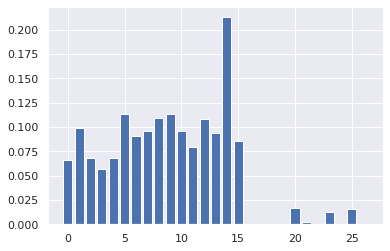

In [7]:
#chama a feature selection passando os datasets
X_treino_fs, X_teste_fs, fs = select_features(X_treino, y_treino, X_teste)

# what are scores for the features (lista o score de cada feature)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [8]:
#pega as 15 variaveis mais importantes.
importantes = np.argpartition(fs.scores_, -4)[-15:]
n_preditoras = [preditoras[i]  for i in importantes ]#if preditoras[i] not in ['V8','V13','V10','V9']





In [9]:
def imprimeBoxPlot(dfTrain, n_preditoras:list, title=None):
  if title==None: title='Box Plot'
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(12, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    data = dfTrain[[c]]
    sns.boxplot(data=data, orient='h', ax=ax[j,k]).set_title(c + " - " + title)

def imprimeScatter(dados, n_preditoras, title=None):
  if title==None: title=' '
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(20, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    sns.scatterplot(data=dados, x='score', y=c, ax=ax[j,k]).set_title(c + " - " + title)


In [10]:
#filtrando outliers
dados = dfTrain.copy()
for c in n_preditoras:
  # selecionando segundo o total
  Q1 = dados[c].quantile(0.25)
  Q3 = dados[c].quantile(0.75)
  IQR = Q3 - Q1
  dados = dados[(dados[c] >= Q1 - (IQR*1.5)) & (dados[c] <= Q3 + (IQR*1.5))]
  

In [11]:
#correlação
display(dados[n_preditoras].corr('pearson'))
display(dados[n_preditoras].corr('spearman'))

V3       V10       V16       V18        V5       V14       V13  \
V3   1.000000  0.448741  0.384287  0.756373  0.922332  0.673328  0.448743   
V10  0.448741  1.000000  0.274971  0.414702  0.464100  0.444690  1.000000   
V16  0.384287  0.274971  1.000000  0.409672  0.261955  0.438812  0.274957   
V18  0.756373  0.414702  0.409672  1.000000  0.627258  0.567911  0.414696   
V5   0.922332  0.464100  0.261955  0.627258  1.000000  0.595953  0.464103   
V14  0.673328  0.444690  0.438812  0.567911  0.595953  1.000000  0.444685   
V13  0.448743  1.000000  0.274957  0.414696  0.464103  0.444685  1.000000   
V7   0.922345  0.464056  0.261896  0.627279  0.999995  0.595929  0.464059   
V9   0.517416  0.950556  0.320234  0.498660  0.480823  0.518634  0.950553   
V4   0.838954  0.405435  0.525277  0.689125  0.699095  0.590624  0.405434   
V15 -0.637699 -0.666589 -0.535905 -0.635799 -0.586829 -0.601299 -0.666588   
V11  0.459354  0.972756  0.308738  0.457403  0.440747  0.445256  0.972754   
V8   0.491966  0.978489  0.334853  0.476385  0.469653  0.475663  0.978488   
V12  0.481053  0.863755  0.366060  0.522841  0.407686  0.436262  0.863750   
V17  0.434257  0.202941  0.126047  0.389827  0.406093  0.038942  0.202942   

           V7        V9        V4       V15       V11        V8       V12  \
V3   0.922345  0.517416  0.838954 -0.637699  0.459354  0.491966  0.481053   
V10  0.464056  0.950556  0.405435 -0.666589  0.972756  0.978489  0.863755   
V16  0.261896  0.320234  0.525277 -0.535905  0.308738  0.334853  0.366060   
V18  0.627279  0.498660  0.689125 -0.635799  0.457403  0.476385  0.522841   
V5   0.999995  0.480823  0.699095 -0.586829  0.440747  0.469653  0.407686   
V14  0.595929  0.518634  0.590624 -0.601299  0.445256  0.475663  0.436262   
V13  0.464059  0.950553  0.405434 -0.666588  0.972754  0.978488  0.863750   
V7   1.000000  0.480815  0.699109 -0.586812  0.440725  0.469626  0.407669   
V9   0.480815  1.000000  0.467525 -0.669580  0.961784  0.979591  0.922636   
V4   0.699109  0.467525  1.000000 -0.639828  0.447489  0.459335  0.481453   
V15 -0.586812 -0.669580 -0.639828  1.000000 -0.684428 -0.690168 -0.674939   
V11  0.440725  0.961784  0.447489 -0.684428  1.000000  0.986336  0.928903   
V8   0.469626  0.979591  0.459335 -0.690168  0.986336  1.000000  0.935836   
V12  0.407669  0.922636  0.481453 -0.674939  0.928903  0.935836  1.000000   
V17  0.406155  0.207381  0.473434 -0.334760  0.243833  0.233006  0.261815   

          V17  
V3   0.434257  
V10  0.202941  
V16  0.126047  
V18  0.389827  
V5   0.406093  
V14  0.038942  
V13  0.202942  
V7   0.406155  
V9   0.207381  
V4   0.473434  
V15 -0.334760  
V11  0.243833  
V8   0.233006  
V12  0.261815  
V17  1.000000

V3       V10       V16       V18        V5       V14       V13  \
V3   1.000000  0.493158  0.387043  0.768023  0.927737  0.720839  0.493164   
V10  0.493158  1.000000  0.270579  0.454494  0.520427  0.467869  1.000000   
V16  0.387043  0.270579  1.000000  0.410721  0.260550  0.459731  0.270571   
V18  0.768023  0.454494  0.410721  1.000000  0.663057  0.604316  0.454495   
V5   0.927737  0.520427  0.260550  0.663057  1.000000  0.633138  0.520434   
V14  0.720839  0.467869  0.459731  0.604316  0.633138  1.000000  0.467877   
V13  0.493164  1.000000  0.270571  0.454495  0.520434  0.467877  1.000000   
V7   0.927729  0.520440  0.260477  0.663058  0.999993  0.633085  0.520447   
V9   0.557973  0.952380  0.317067  0.532456  0.536938  0.544570  0.952377   
V4   0.850290  0.449334  0.532904  0.702473  0.719533  0.636692  0.449333   
V15 -0.663550 -0.689712 -0.534338 -0.649508 -0.621613 -0.632804 -0.689717   
V11  0.502417  0.976847  0.307687  0.496331  0.499976  0.469764  0.976846   
V8   0.533881  0.976796  0.334661  0.514859  0.524365  0.503414  0.976794   
V12  0.517568  0.881903  0.381205  0.554188  0.464916  0.471146  0.881902   
V17  0.421272  0.221528  0.128649  0.377807  0.413858  0.063108  0.221513   

           V7        V9        V4       V15       V11        V8       V12  \
V3   0.927729  0.557973  0.850290 -0.663550  0.502417  0.533881  0.517568   
V10  0.520440  0.952380  0.449334 -0.689712  0.976847  0.976796  0.881903   
V16  0.260477  0.317067  0.532904 -0.534338  0.307687  0.334661  0.381205   
V18  0.663058  0.532456  0.702473 -0.649508  0.496331  0.514859  0.554188   
V5   0.999993  0.536938  0.719533 -0.621613  0.499976  0.524365  0.464916   
V14  0.633085  0.544570  0.636692 -0.632804  0.469764  0.503414  0.471146   
V13  0.520447  0.952377  0.449333 -0.689717  0.976846  0.976794  0.881902   
V7   1.000000  0.536973  0.719514 -0.621579  0.500007  0.524394  0.464946   
V9   0.536973  1.000000  0.511903 -0.689056  0.964617  0.981768  0.931852   
V4   0.719514  0.511903  1.000000 -0.669158  0.489195  0.504392  0.531911   
V15 -0.621579 -0.689056 -0.669158  1.000000 -0.707403 -0.711154 -0.704487   
V11  0.500007  0.964617  0.489195 -0.707403  1.000000  0.987378  0.941337   
V8   0.524394  0.981768  0.504392 -0.711154  0.987378  1.000000  0.948521   
V12  0.464946  0.931852  0.531911 -0.704487  0.941337  0.948521  1.000000   
V17  0.413899  0.219408  0.483411 -0.330467  0.252956  0.245496  0.269380   

          V17  
V3   0.421272  
V10  0.221528  
V16  0.128649  
V18  0.377807  
V5   0.413858  
V14  0.063108  
V13  0.221513  
V7   0.413899  
V9   0.219408  
V4   0.483411  
V15 -0.330467  
V11  0.252956  
V8   0.245496  
V12  0.269380  
V17  1.000000

In [12]:
dados_corr = dados[n_preditoras].corr('pearson')
retirar=[]
analisada = []
for c in dados_corr.columns:
  res = dados_corr[dados_corr[c]>=0.9]
  sai=[]
  for i in res.index.to_list():
    if i in retirar: break
    if i!=c: sai.append(c)
  if len(sai)>0:
    retirar.append(c)

In [13]:
n_preditoras = [c for c in n_preditoras if not c in retirar]

In [14]:
n_preditoras

['V16', 'V18', 'V5', 'V14', 'V13', 'V7', 'V9', 'V4', 'V15', 'V11', 'V8', 'V17']

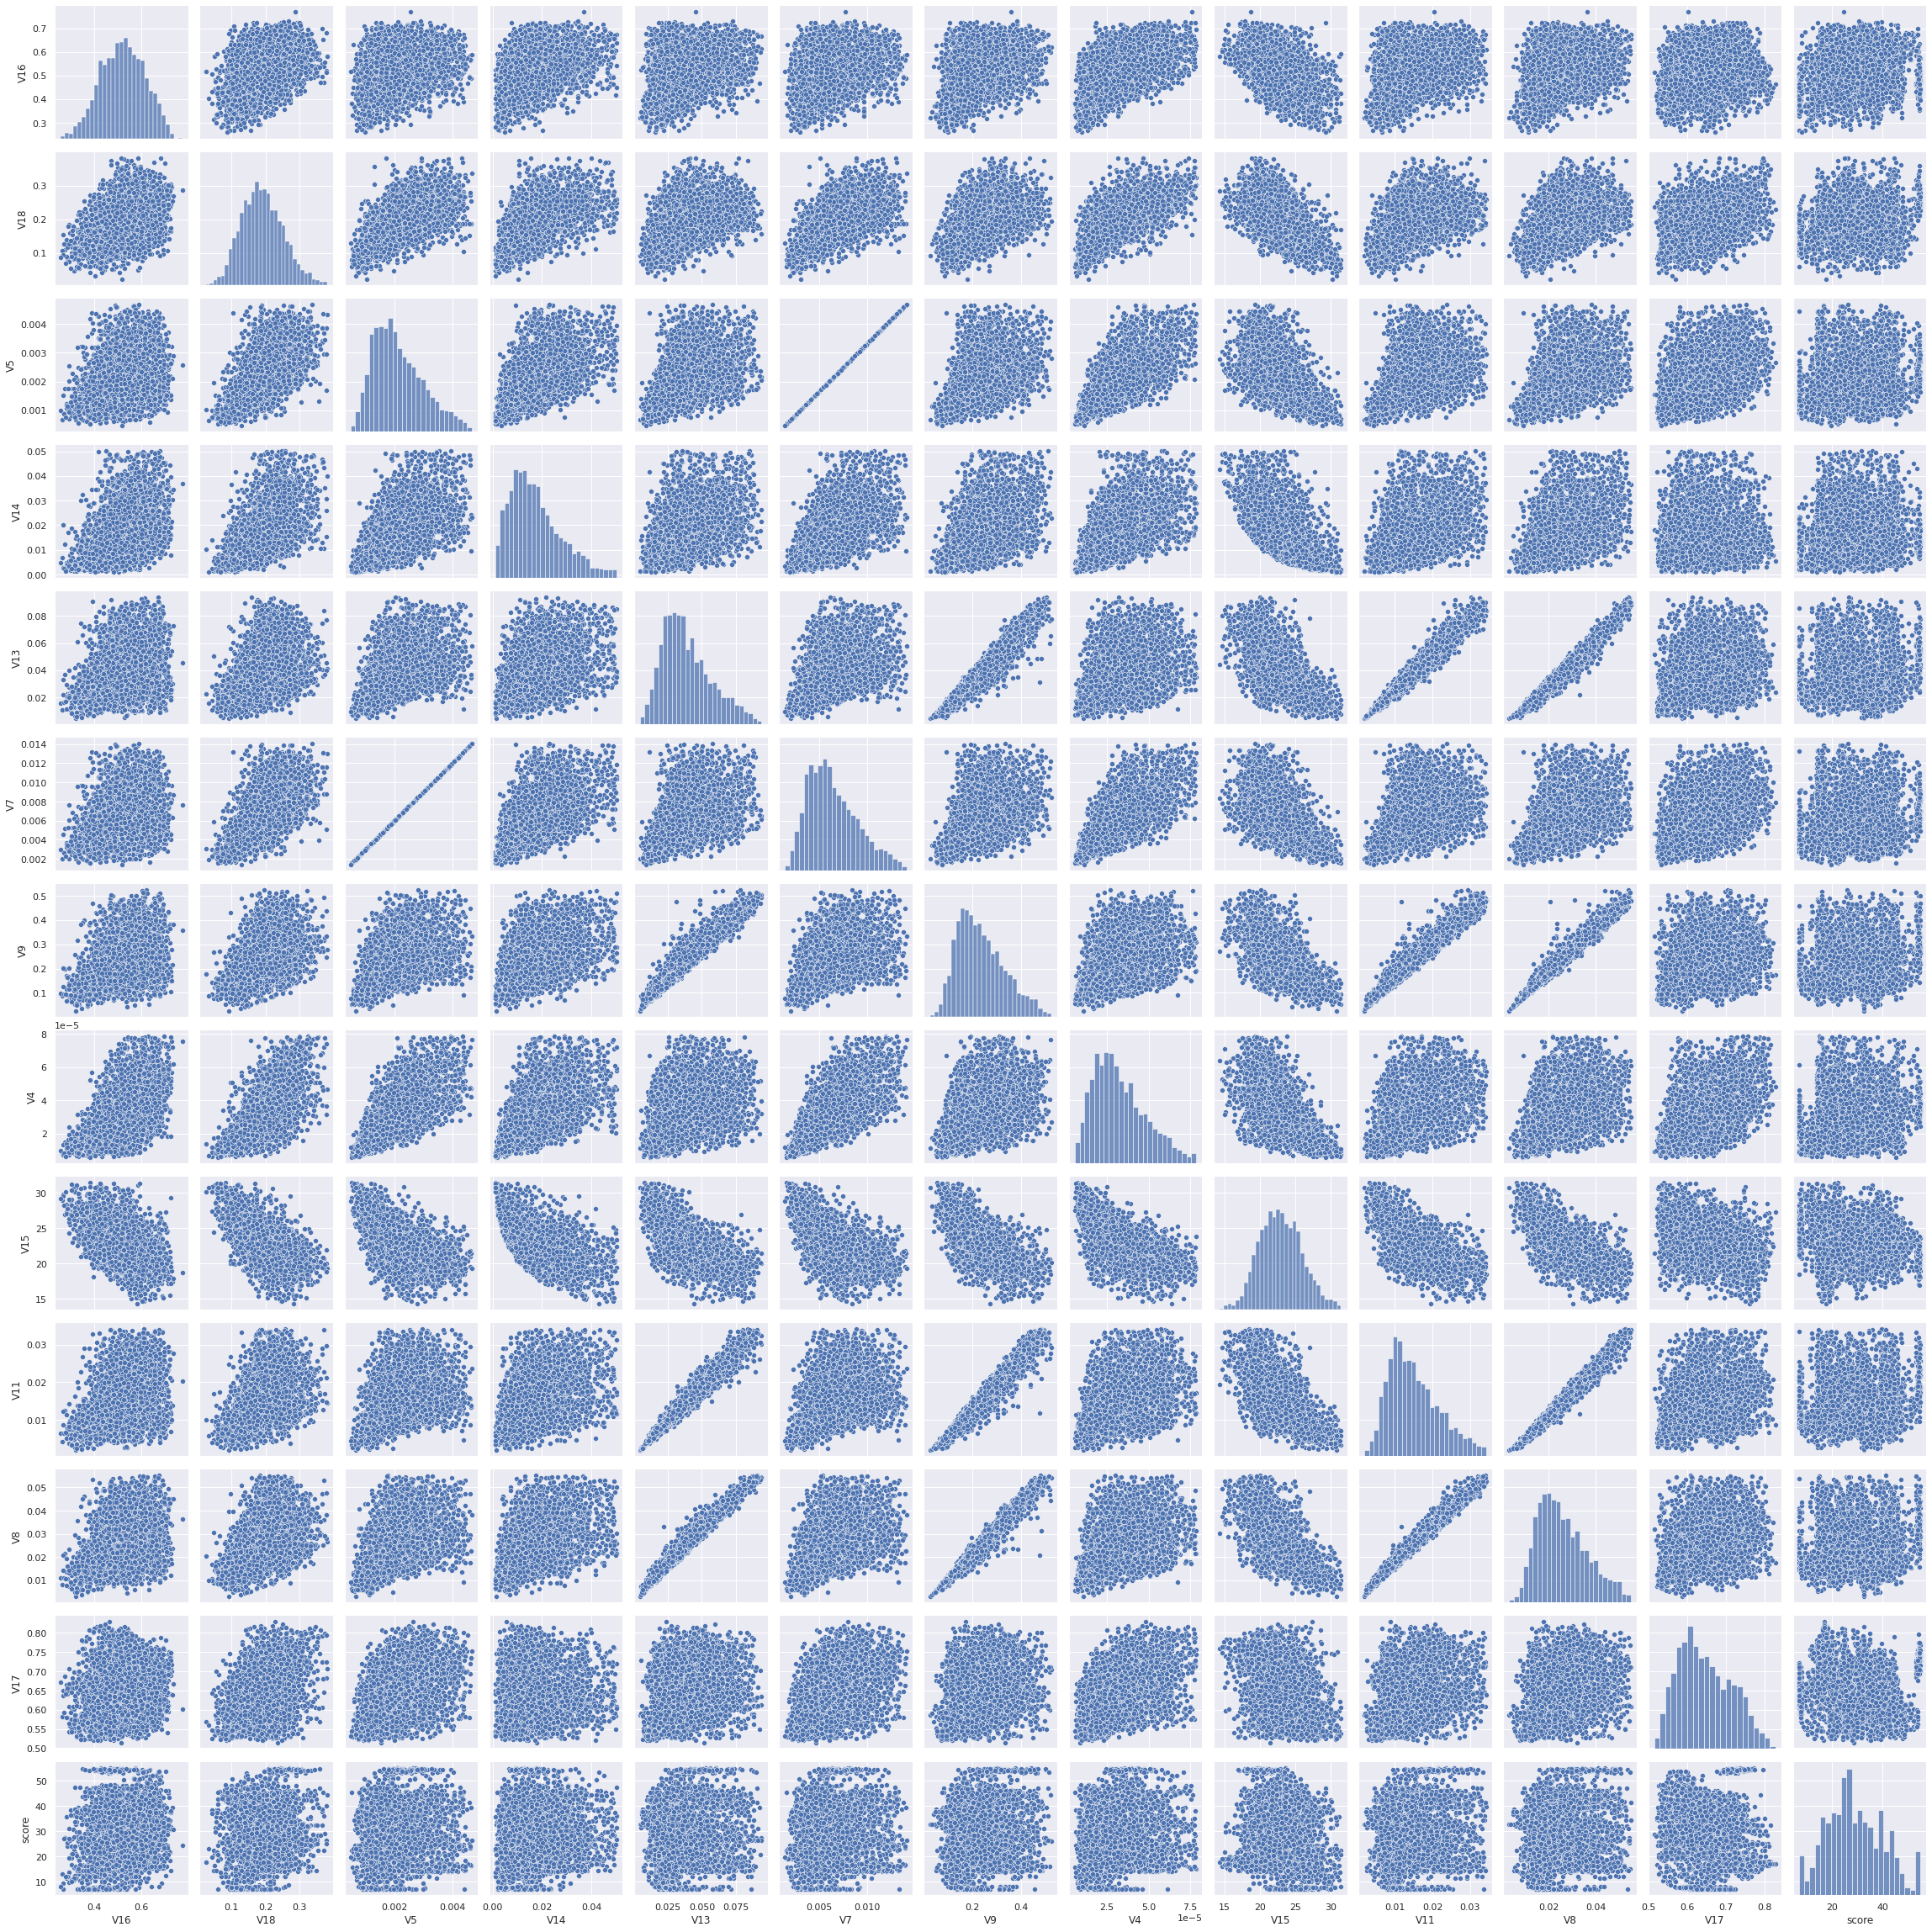

In [15]:
sns.pairplot(dados[(','.join(n_preditoras) + ',score').split(',')])
plt.show()

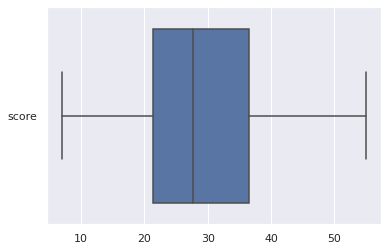

In [16]:
sns.boxplot(data=dfTrain[['score']], orient='h')


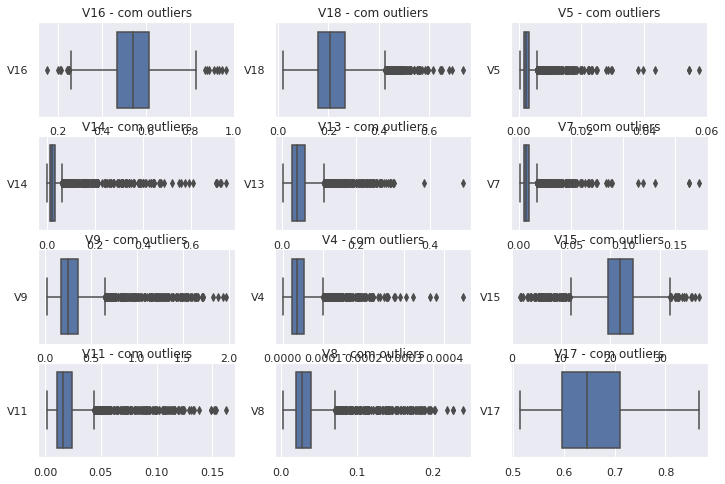

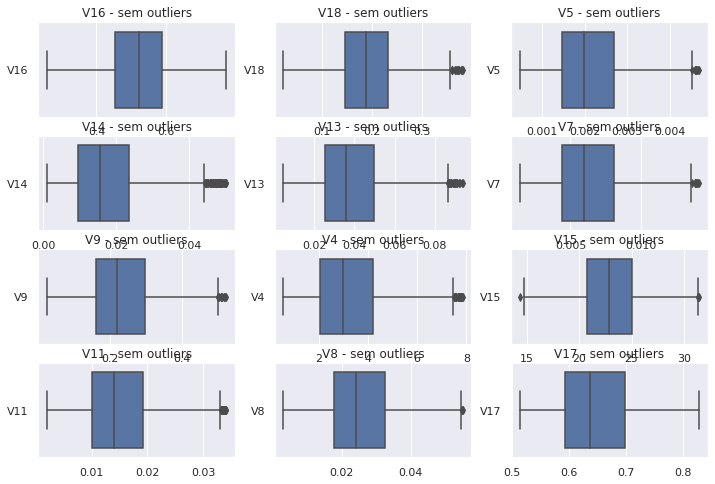

In [17]:
#box plot antes dos outliers
imprimeBoxPlot(dfTrain, n_preditoras, 'com outliers')
#box plot sem os outliers
imprimeBoxPlot(dados, n_preditoras, 'sem outliers')

In [18]:
n_preditoras

['V16', 'V18', 'V5', 'V14', 'V13', 'V7', 'V9', 'V4', 'V15', 'V11', 'V8', 'V17']

(3205, 2)


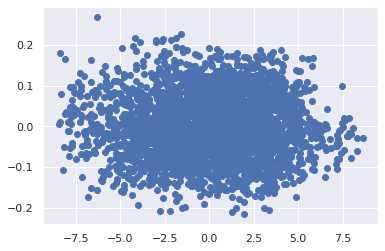

In [19]:

###########
# projecting data in 2D
###########
X = dados[n_preditoras]
pca_proj=PCA(n_components=2)
data_2d=pca_proj.fit_transform(X)
print(data_2d.shape)

plt.scatter(data_2d[:,0],data_2d[:,1])


In [20]:
X = dados[n_preditoras]
y = dados['score'].map(lambda x: np.log(x+ 0.01))
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [21]:
linreg = LinearRegression()
linreg.fit(X_treino, y_treino)
y_pred_linreg = linreg.predict(X_teste)
r2_linreg = r2_score(y_teste, y_pred_linreg)
print('R2:',r2_linreg)
mse_linreg = mean_squared_error(y_teste, y_pred_linreg)
print('MSE:',mse_linreg)


R2: 0.1300201604329395
MSE: 0.16009006620963087


In [22]:


# define a transformação nos dados
transformer = PolynomialFeatures(degree=3, include_bias=False)
#x = X_treino.reshape((-1, 1))
transformer.fit(X_treino)
#print('Dados originais:\n', X_treino)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(X_treino)
x_t = transformer.transform(X_teste)
#print('Novos dados:\n', x_[0:1])

In [23]:
model = LinearRegression().fit(x_, y_treino)
y_pred = model.predict(x_)

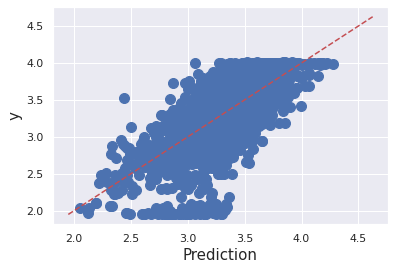

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_treino, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_treino), 1.2*max(y_treino),(max(y_treino)-min(y_treino))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

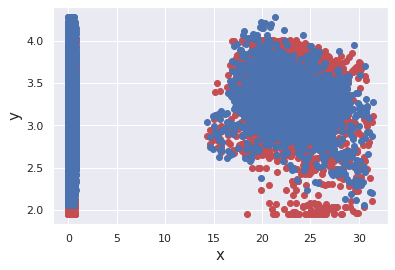

In [25]:
plt.plot(X_treino,y_treino, 'ro', label='Dados originais')
plt.plot(X_treino,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

In [26]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_t)
R2 = r2_score(y_teste, y_pred)
print('R2:', R2)
MSE = mean_squared_error(y_teste, y_pred)
RMSE =  mean_squared_error(y_teste, y_pred, squared=False)
print('MSE:', MSE)


R2: 0.13065877934802306
MSE: 0.15997255021701967


In [ ]:


vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = RandomForestRegressor(n_estimators=n, random_state= 12)
    model.fit(x_,y_treino)
    y_pred = model.predict(x_t) 
    score = mean_squared_error(y_pred, y_teste)
    rmse =  mean_squared_error(y_pred, y_teste, squared=False)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score, 'rmse:', rmse)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

Number of Estimators: 1 mse: 0.25394400148611657 rmse: 0.5039285678408365
Number of Estimators: 11 mse: 0.1292827586016669 rmse: 0.35955911697753806
Number of Estimators: 21 mse: 0.12427699330456504 rmse: 0.3525294218991729
Number of Estimators: 31 mse: 0.12643455659153752 rmse: 0.3555763723752431


In [28]:
modelRf = RandomForestRegressor(n_estimators=best_n, random_state=12)
modelRf.fit(x_,y_treino)
y_pred = modelRf.predict(x_t) 
mse = mean_squared_error(y_pred, y_teste)
mae = mean_absolute_error(y_pred, y_teste)
rmse =  mean_squared_error(y_pred, y_teste, squared=False)
#r2 = r2_score(y_pred, y_teste)
rmse, mse, mae 


(0.12259030027894813, 0.2641951970592328)

In [29]:
pred = pd.DataFrame(y_pred, columns=['predito']).reset_index()
y = pd.DataFrame(y_teste).reset_index().drop(columns='index').reset_index()
res = pd.merge(pred, y, on='index', how='inner')
res.head(10)

index   predito     score
0      0  3.349872  3.674223
1      1  3.191333  2.816905
2      2  3.318850  3.204209
3      3  3.578831  3.229183
4      4  3.458169  2.944965
5      5  3.302426  3.539044
6      6  3.411807  3.681502
7      7  2.875660  2.574138
8      8  3.314831  2.865396
9      9  2.963092  2.978077

Number of Estimators: 1 mse: 0.2858280733113934 rmse: 0.5346289117803052
Number of Estimators: 11 mse: 0.127748350924508 rmse: 0.357419013098783
Number of Estimators: 21 mse: 0.12046190744668339 rmse: 0.34707622714136355
Number of Estimators: 31 mse: 0.12096975751296561 rmse: 0.34780706938325107
Number of Estimators: 41 mse: 0.11980081125567021 rmse: 0.3461225379192609
Number of Estimators: 51 mse: 0.11864765764447865 rmse: 0.3444526928977021
Number of Estimators: 61 mse: 0.11838207134179267 rmse: 0.3440669576431202
Number of Estimators: 71 mse: 0.1184625613100797 rmse: 0.34418390623339684
Number of Estimators: 81 mse: 0.11766606439508884 rmse: 0.34302487430955914
Number of Estimators: 91 mse: 0.11816871604008687 rmse: 0.3437567687189401
Melhor n: 81  com mse: 0.11766606439508884


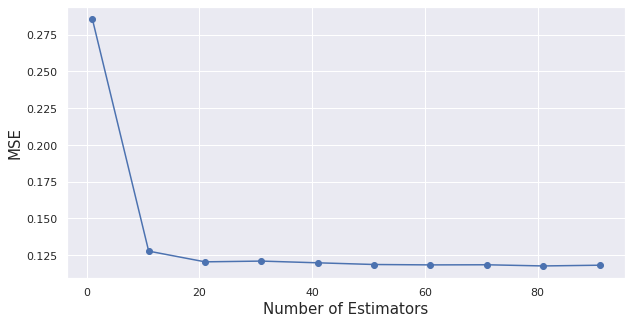

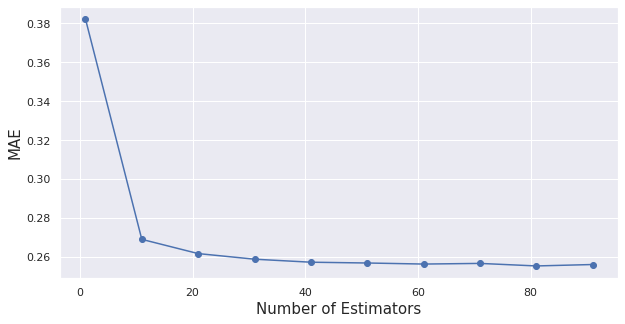

In [38]:
vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = ExtraTreesRegressor(n_estimators=n, random_state= 12)
    model.fit(x_,y_treino)
    y_pred = model.predict(x_t) 
    score = mean_squared_error(y_pred, y_teste)
    rmse =  mean_squared_error(y_pred, y_teste, squared=False)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score, 'rmse:', rmse)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

In [36]:
modelETR = ExtraTreesRegressor(n_estimators=best_n, random_state=12, n_jobs = -1)
modelETR.fit(x_,y_treino)
y_pred = modelRf.predict(x_t) 
mse = mean_squared_error(y_pred, y_teste)
mae = mean_absolute_error(y_pred, y_teste)
rmse =  mean_squared_error(y_pred, y_teste, squared=False)
#r2 = r2_score(y_pred, y_teste)
rmse, mse, mae 

KeyboardInterrupt: ignored

In [30]:
dfTest = pd.read_csv('test.csv')
X_teste = dfTest[n_preditoras]
x_teste = transformer.transform(X_teste)
y_pred = model.predict(x_teste) 

In [31]:
dfRes = pd.DataFrame()
dfRes['Id'] = dfTest['Id']
dfRes['Expected'] = np.exp(y_pred-0.01)

In [32]:
dfRes.to_csv('hed_result.csv', index=False)

In [33]:
!head hed_result.csv 

Id,Expected
1178,28.10981582656143
4954,18.87038141959159
1269,21.52169773885445
5269,33.08707605244796
143,24.915570537124328
2531,30.132455244127012
3219,27.807033299140652
967,25.203747799868914
4567,27.095138325772442
